In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
tfrecord_path_train =  'D:\Coco\coco_train.tfrecord'
tfrecord_path_val =  'D:\Coco\coco_val.tfrecord'

In [4]:
image_feature_description  = {
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
    'image/object/class/label': tf.io.VarLenFeature(tf.int64),
}

In [5]:
def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

In [26]:
def print_img(img):
    imgplot = plt.imshow(img.numpy().astype(dtype='uint8'))

In [45]:
def parse_tfrecord(example_proto):
    x_train = tf.image.decode_jpeg(example_proto['image/encoded'], channels=3)
    x_train = tf.image.resize(x_train, (416, 416))

    # class_text = tf.sparse.to_dense(
    #     x['image/object/class/text'], default_value='')
    labels = tf.cast(tf.sparse.to_dense(example_proto['image/object/class/label']), tf.float32)
    print(labels)

    y_train = tf.stack([tf.sparse.to_dense(example_proto['image/object/bbox/xmin']),
                        tf.sparse.to_dense(example_proto['image/object/bbox/ymin']),
                        tf.sparse.to_dense(example_proto['image/object/bbox/xmax']),
                        tf.sparse.to_dense(example_proto['image/object/bbox/ymax']),
                        labels]
                        , axis=1)

    paddings = [[0, 100 - tf.shape(y_train)[0]], [0, 0]]
    y_train = tf.pad(y_train, paddings)
    train = {
        "y_train" : y_train,
        "x_train" : x_train
    }

    return train


In [46]:
raw_dataset = tf.data.TFRecordDataset(tfrecord_path_train)
parsed_dataset = raw_dataset.map(_parse_image_function)

Tensor("Cast:0", shape=(None,), dtype=float32)
tf.Tensor(
[[7.6013186e-04 8.6527778e-04 8.9121092e-04 1.4769532e-03 1.6000000e+01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.000000

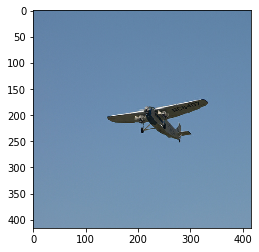

In [49]:
dataset = parsed_dataset.map(parse_tfrecord)

for image_features in dataset.take(6):
    print_img(image_features['x_train'])
    print(image_features['y_train'])
